In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mglearn
from IPython.display import display

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 신경망(딥러닝)


## 다층 퍼셉트론(Multilayer Perceptrons, MLP)
- feed-forward neural network, 
- MLP는 선형모델의 일반화된 모습
\begin{equation*}
\hat y = w_0  x_0 + w_1 x_1 + ... + w_p  x_p + b
\end{equation*}
- \begin{equation*}예측값 \hat y은 x_0에서 x_p까지의 특성과 w_0에서 w_p까지 학습된 계수의 가중치 합이다. \end{equation*}

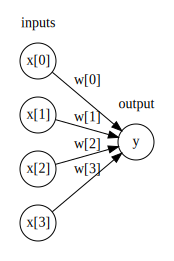

In [5]:
display(mglearn.plots.plot_logistic_regression_graph())

- MLP에서는 위와같이 가중치 합을 만드는 과정이 여러 번 반복되며, 중간단계를 구성하는 은닉 유닛을 계산하고 이를 이하여 다시 가중치 합을 계산해 최종 결과를 산출한다. 
- 여러 개의 가중치 합을 계산하는 것은 수학적으로 보면 하나의 가중치 합을 계산하는 것과 같다. 
- 따라서 선형 모델보다 강력하게 만들기 위하여 activation function(활성화함수)를 사용한다. 
- 은닉 유닛의 가중치 합을 계산하고 활성화 함수를 통해 출력값을 만든다. 
- 활성화 함수는 주로 비선형 함수인 렐루(Rectified linear unit, ReLU), 하이퍼볼릭 탄젠트(Hyperbolic Tangent, tanh)함수를 이용한다. (시그모이드도 활성화 함수의 하나)
- 렐루 함수는 0이하를 잘라버리는 간단한 함수이다.
- tanh 함수는 낮은 입력값에 대해서 -1로 수렴하고 큰 입력값에 대해서는 +1 로 수렴한다. 
- 이런 활성화 함수를 통해 신경망이 선형 모델에서보다 더 복잡한 함수를 학습할 수 있다

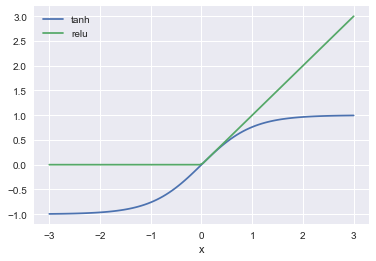

In [11]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0), label = 'relu')
plt.legend(loc = 'best')
plt.xlabel('x')

- tanh 함수를 활성화 함수로 했을 때 아래의 y의 출력값을 구하는 전체 공식은 다음과 같다. 
\begin{equation*}
    h[0] = tanh(w[0.0]x[0] + w[1,0]x[1] + w[2,0]x[2] + w[3,0]x[3] + b[0])
\end{equation*}
\begin{equation*}
    h[1] = tanh(w[0.1]x[0] + w[1,1]x[1] + w[2,1]x[2] + w[3,1]x[3] + b[1])
\end{equation*}
\begin{equation*}
    h[2] = tanh(w[0.2]x[0] + w[1,2]x[1] + w[2,2]x[2] + w[3,2]x[3] + b[2])
\end{equation*}
\begin{equation*}
    \hat y = v[0]  h[0] + v[1]  h[1] + v[2]  h[2] + b
\end{equation*}


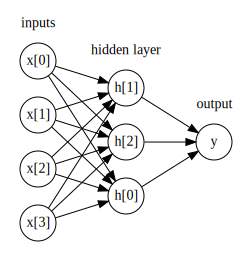

In [6]:
display(mglearn.plots.plot_single_hidden_layer_graph())

## 은닉층을 한개 더 추가한 모습
- 많은 은닉층으로 구성된 대규모의 신경망이 딥러닝이다. 

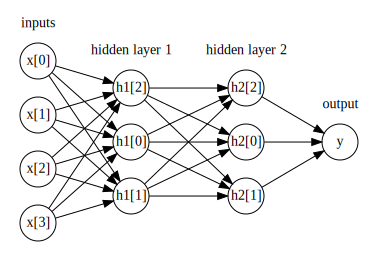

In [10]:
display(mglearn.plots.plot_two_hidden_layer_graph())

## 신경망 튜닝

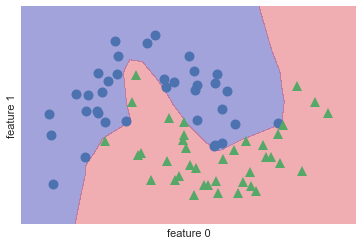

In [12]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

mlp = MLPClassifier(solver='lbfgs', random_state= 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

- MLP는 기본값으로 은닉 유닛 100개를 사용한다. 작은 데이터셋에는 너무 많다. 
- 10개로 줄여본 결과 좀 더 경계가 날카로워 졌다
- 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개 합쳐져서 구성된다. 
- 은닉 유닛을 추가함으로써 매끄러운 결정 경계를 구할수 있다. 

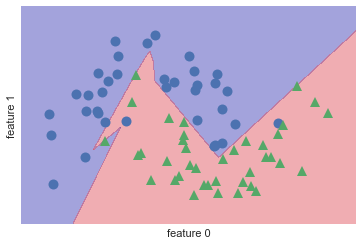

In [16]:
# 10개의 유닛으로 된 하나의 은닉층(relu)
mlp = MLPClassifier(hidden_layer_sizes=[10], solver='lbfgs', random_state = 42).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

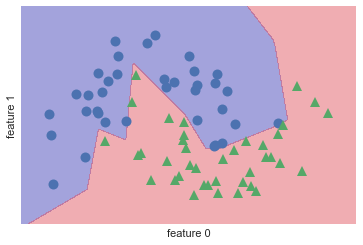

In [17]:
# 10개의 유닛으로 된 두개의 은닉층(relu)
mlp = MLPClassifier(hidden_layer_sizes=[10, 10], solver='lbfgs', random_state = 42).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

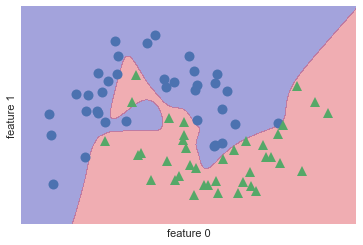

In [18]:
# 10개의 유닛으로 된 두개의 은닉층(tanh 활성화)
mlp = MLPClassifier(hidden_layer_sizes=[10, 10], solver='lbfgs', activation='tanh', random_state = 42).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

- 릿지 회귀와 linerSVC에서 한 것처럼 L2패널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도 제어 가능
- alpha 매개변수를 통해 규제가 가능하다. 기본 값은 매우 낮게 되어있어서 규제하지 않는다.
- 아래는 은닉층 2개를 이용했을때 alpha값이 미치는 영향을 보여준다.

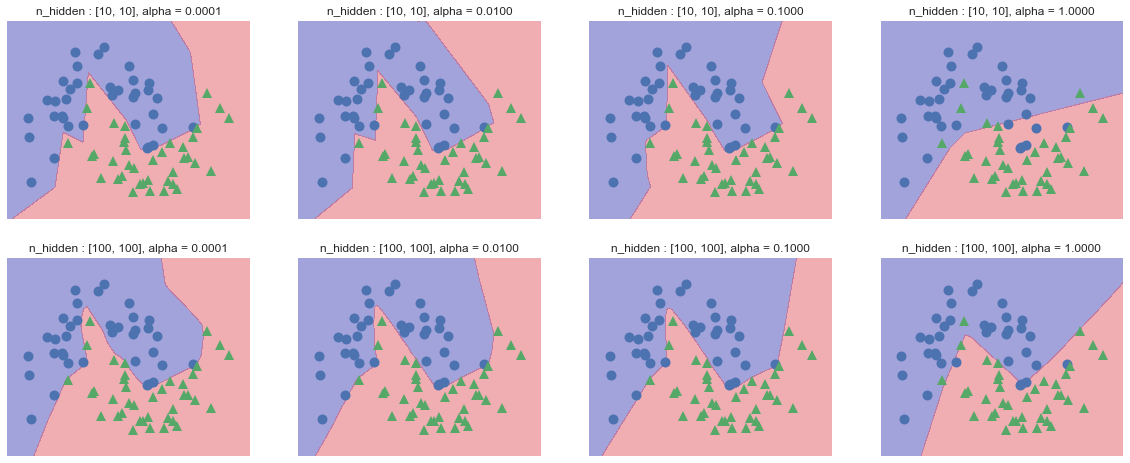

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_node in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(hidden_layer_sizes= [n_hidden_node, n_hidden_node], alpha = alpha, solver = 'lbfgs', random_state = 42).fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title('n_hidden : [{}, {}], alpha = {:.4f}'.format(n_hidden_node, n_hidden_node, alpha))
        

- random_state 는 학습 시작전 가중치를 무작위로 설정하였을 때 사용하는 시드이다. 초기화가 다르면 다른 모델이 나온다. 

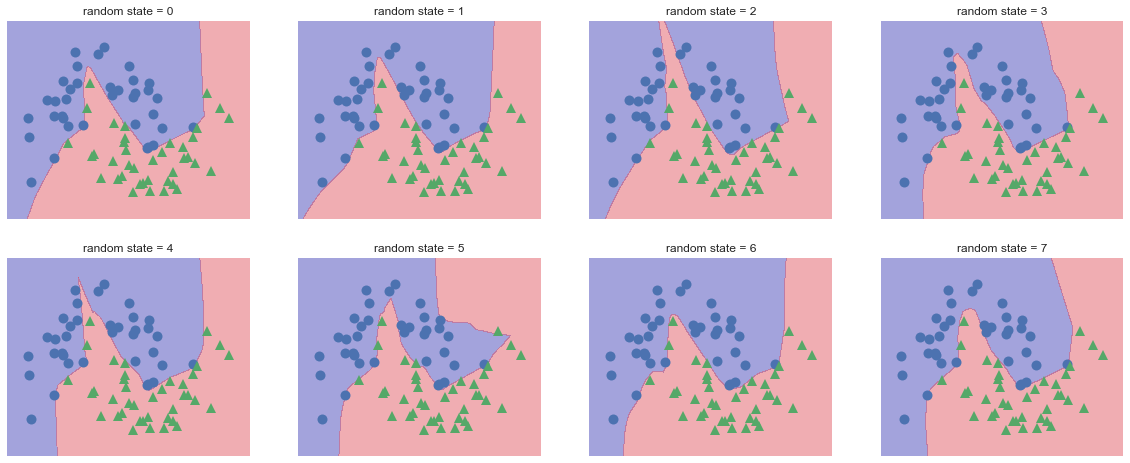

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(hidden_layer_sizes=[100, 100], solver = 'lbfgs', random_state = i).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
    ax.set_title('random state = {}'.format(i))

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print('유방암 데이터의 특성별 최대값 : \n{}'.format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값 : 
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(X_test, y_test)))

훈련 세트 정확도 : 0.91
테스트 세트 정확도 : 0.88


- 신경망에서도 모든 입력 특성을 평균은 0, 분산은 1이 되도록 스케일링 하는것이 좋다. 

In [32]:
mean_on_train = X_train.mean(axis = 0)
std_on_train = X_train.std(axis = 0)

X_train_scaled= (X_train - mean_on_train)/std_on_train

X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state = 0).fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.99
테스트 세트 정확도 : 0.97


C:\Users\POWER USER\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


- 경고는 Adamoptimizer와 관련이 있다. Adam은 경사 하강법의 learning_rate 매개변수를 학습이 반복됨에 따라 자동으로 조정해 나가는 알고리즘 중 하나이다. solver의 기본값이 adam이고 max_iter의 기본값은 200이다.

In [33]:
mlp = MLPClassifier(random_state = 0, max_iter = 1000).fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.99
테스트 세트 정확도 : 0.97


- alpha를 기본값 0.0001에서 1로 증가시켜 모델의 복잡도를 낮추었다. 

In [35]:
mlp = MLPClassifier(random_state = 0, max_iter = 1000, alpha=1).fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.99
테스트 세트 정확도 : 0.97


In [42]:
mlp.coefs_[0].shape

(30, 100)

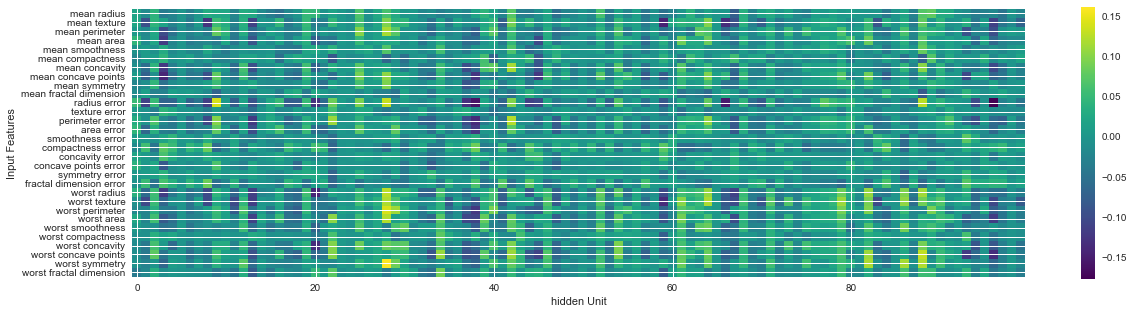

In [36]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden Unit')
plt.ylabel('Input Features')
plt.colorbar()

## 신경망의 장단점과 매개변수
- 대량의 데이터에 내재된 정보를 잡아내고 복잡한 모델 구축가능
- 학습이 오래걸리고, 데이터 전처리가 필수적
- SVM과 같이 모든 특성이 같은 의미를 가진 동질의 데이터에서 우수한 작동(다른 종류의 특성이면 트리기반이 더 좋을지도)
## 신경망의 복잡도
- 은닉층의 갯수와 은닉층의 노드 수가 가장 중요한 매개변수다. 
- 일반적인 매개변수 조정 방법은 먼저 충분히 과대적합시켜 문제를 해결할만한 큰 모델을 만든다. 
- 훈련데이터가 충분히 학습 될 수 있다고 생각될 때 신경망 구조를 줄이거나 규제를 강화시켜(alpha를 증가시켜) 일반화 성능을 잡는다. 
## solver
- 기본값은 adam으로 대부분의 경우 잘 작동하지만 데이터의 스케일에 민감하여 (평균 0, 분산 1로 조정하는 standarization 필요)
- lbfgs는 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는시간이 오래걸린다. 
- BFGS 알고리즘은 의사뉴턴 메서드중 하나로 L-BFGS(Limited-memory BFGS)는 이를 제한된 메모리 공간에서 구현하는 것
- sgd옵션은 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있다. 
- sgd 알고리즘은 momentum방식과 nesterovs_momentum이 있다. 모멘텀 방식은 이전의 그래디언트를 momentum 매개변수 비율만큼 현재 계산된 그래디언트에 반영하여 갱신할 그래디언트를 구한다. 일정 비율의 과거 그래디언트를 모두 포함하고 있어 마치 관성같은 효과를 준다. 
- 네스테로프 모멘텀은 모멘텀에서 구한 그래디언트를 이전 그래디언트로 가정하고 한번 더 모멘텀방식을 적용하여 갱신할 그래디언트를 계산한다. 



# 분류 예측의 불확실성 추정
- 어떤 데이터 포인트에 대해 분류기가 예측한 클래스가 ㅁ엇인지 뿐만 아니라 정확한 클래스임을 확신하는지가 더 중요할 때가 많다. 
- 불확실성을 추정할수 있는 함수 decision_function, predict_proba가 있다. 

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train, y_test = train_test_split(X, y_named, random_state =0)
GBoost = GradientBoostingClassifier().fit(X_train, y_train)

## 결정함수
- 이진 분류에서 decision_function 반환값의 크기는 (n_samples, )이고, 각 샘플이 하나의 실수 값을 반환한다. 
- 이 값은 모델이 데이터포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도이다. 양수는 양성 클래스를 의미하며, 음수 값은 음성클래스를 의미

In [47]:
print('X_test.shape: {}'.format(X_test.shape))
print('결정 함수 결과 형태 : {}'.format(GBoost.decision_function(X_test).shape))

print('결정 함수 : \n {}'.format(GBoost.decision_function(X_test)))

X_test.shape: (25, 2)
결정 함수 결과 형태 : (25,)
결정 함수 : 
 [ 4.13592629 -1.71183791 -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.6959526   4.11001634  1.06347424  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.70138563]


In [48]:
print('임계치와 결정 함수 결과 비교 : \n{}'.format(GBoost.decision_function(X_test)>0))
print('예측 : {}'.format(GBoost.predict(X_test)))

임계치와 결정 함수 결과 비교 : 
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측 : ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


- 이진 분류에서 음성 클래스는 항상 classes_ 속성의 첫번째 원소이고 양성클래스는 두번째 원소이다. 

In [52]:
# 불리언 값을 0, 1로 변환
greater_zero = (GBoost.decision_function(X_test)> 0).astype(int)
# classes_에 인덱스로 사용
pred = GBoost.classes_[greater_zero]

print('pred는 예측결과 predict와 같다 : {}'.format(np.all(pred == GBoost.predict(X_test))))

pred는 예측결과 predict와 같다 : True


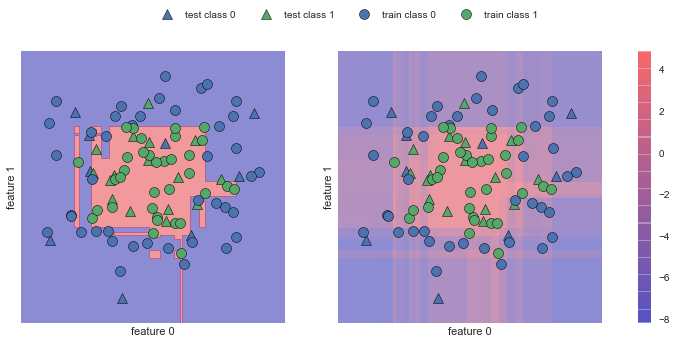

In [59]:
fig , axes = plt.subplots(1, 2, figsize = (13, 5))
mglearn.tools.plot_2d_separator(GBoost, X, ax = axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(GBoost, X, ax = axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트 그리기 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax, markeredgewidth=0.5)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax, markeredgewidth=0.5)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['test class 0', 'test class 1', 'train class 0', 'train class 1'], ncol = 4, loc=(0.5, 1.1))

## 예측 확률
- predict_proba 의 출력은 각 클래스에 대한 확률
- 두개의 확률 중 더 높은 확률을 갖는 클래스가 예측 클래스가 된다.
- 대부분의 포인트에서 

In [63]:
print('확률 값의형태 :{}'.format(GBoost.predict_proba(X_test).shape))
print('예측 확률 :{}'.format(GBoost.predict_proba(X_test)))

확률 값의형태 :(25, 2)
예측 확률 :[[  1.57362600e-02   9.84263740e-01]
 [  8.47074518e-01   1.52925482e-01]
 [  9.81128693e-01   1.88713075e-02]
 [  9.74067751e-01   2.59322495e-02]
 [  1.35214179e-02   9.86478582e-01]
 [  2.50463685e-02   9.74953631e-01]
 [  9.99545543e-01   4.54457043e-04]
 [  1.61426459e-02   9.83857354e-01]
 [  2.56646082e-01   7.43353918e-01]
 [  3.20518856e-02   9.67948114e-01]
 [  9.98441742e-01   1.55825797e-03]
 [  1.35214179e-02   9.86478582e-01]
 [  1.98099196e-02   9.80190080e-01]
 [  7.68580268e-01   2.31419732e-01]
 [  2.50463685e-02   9.74953631e-01]
 [  9.84817488e-01   1.51825121e-02]
 [  7.73836115e-01   2.26163885e-01]
 [  9.80463918e-01   1.95360817e-02]
 [  1.73607853e-02   9.82639215e-01]
 [  1.61426459e-02   9.83857354e-01]
 [  1.61426459e-02   9.83857354e-01]
 [  3.41393690e-01   6.58606310e-01]
 [  6.30759354e-02   9.36924065e-01]
 [  9.34424780e-01   6.55752202e-02]
 [  8.45715619e-01   1.54284381e-01]]


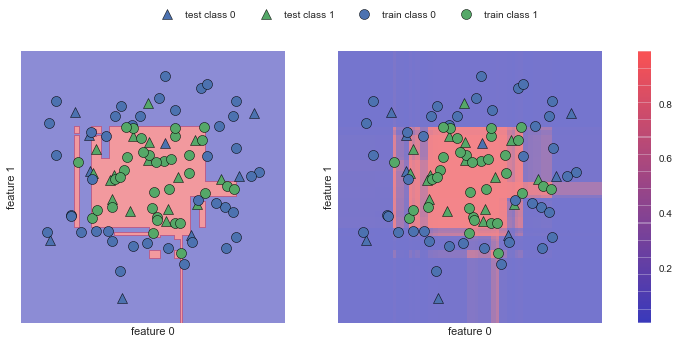

In [65]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(GBoost, X, ax=axes[0], alpha=.4, fill=True, cm= mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(GBoost, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function = 'predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax, markeredgewidth=0.5)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax, markeredgewidth=0.5)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['test class 0', 'test class 1', 'train class 0', 'train class 1'], ncol = 4, loc=(0.5, 1.1))

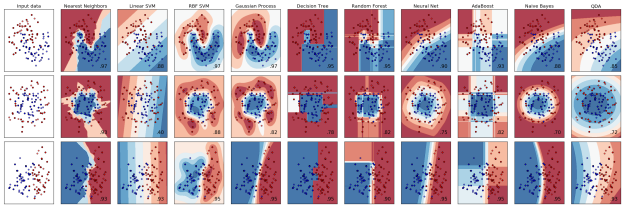

# 다중 분류에서의 불확실성
- decision_function과 predict_proba 메서드는 다중 분류에도 사용할 수 있다. 
- decision의 결과값의 크기는 (n_samples, n_classes)이다. 
- 각 열은 각 클래스에 대한 확신 점수를 담고 있고, 수치가 크면 클래스일 가능성이 크다는 의미이다. 
- predict_proba의 결과값 크기 역시 (n_samples, n_classes)의 모양일 가지는 확률 배열이다. 
- 각 데이터 포인트에서의 클래스 확률의 합은 1이다.

In [68]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)
GBoost = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0).fit(X_train, y_train)

print("결정 함수의 결과 형태: {}".format(GBoost.decision_function(X_test).shape))
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n{}".format(GBoost.decision_function(X_test)))

print("가장 큰 결정 함수의 인덱스:\n{}".format(np.argmax(GBoost.decision_function(X_test), axis=1)))
print("예측:\n{}".format(GBoost.predict(X_test)))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53043817 -0.4676268   1.50129926]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52419721 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.52419721 -0.4676268   1.51953786]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.53107259 -0.45541112  1.46576456]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52419721 -0.4676268   1.51953786]
 [-0.52419721 -0.4676268   1.501

In [71]:
# predict_proba 결과 중 앞부분 일부를 확인합니다.
print("예측 확률:\n{}".format(GBoost.predict_proba(X_test)))
# 행 방향으로 확률을 더하면 1이 됩니다.
print("합: {}".format(GBoost.predict_proba(X_test).sum(axis=1)))

예측 확률:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10170311  0.10829611  0.79000078]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10317625  0.10986475  0.786959  ]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.1022747   0.1082272   0.78949809]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.1022747   0.1082272   0.78949809]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10588375  0.11420593  0.77991032]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.1022747   0.1082272   0.78949809]
 [ 0.10375517  0.10979383  0.786451  ]
 [ 0.1022747   0.1

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print('훈련데이터에 있는 클래스 종류 : {}'.format(logreg.classes_))
print('예측 : {}'.format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis = 1)
print('가장 큰 결정 함수의 인덱스 : {}'.format(argmax_dec_func))
print('인덱스를 classes_에 연결 : \n{}'.format(logreg.classes_[argmax_dec_func]))

훈련데이터에 있는 클래스 종류 : ['setosa' 'versicolor' 'virginica']
예측 : ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스 : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
인덱스를 classes_에 연결 : 
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']


# 요약 및 정리
- 훈련데이터의 다양한 특징을 반영하지 못하는 과소적합
- 훈련 데이터에 너무 맞춰져 있어 새로운 데이터에 일반적이지 못하는 과대적합
- 매개변수 설정이 매우 중요하고, 어떤 알고리즘은 입력 데이터나, 입력 특성의 스케일에 크게 영향을 받는다. 

### 최근접 이웃
- 작은 데이터셋일 경우, 기본 모델로써 좋고 설명이 쉬움
### 선형 모델
- 첫 번째로 시도할 알고리즘, 대용량, 고차원 데이터셋에 사용 가능

### 나이브 베이즈
- 분류만 가능, 선형 모델보다 빠름, 대용량, 고차원 데이터셋에 사용가능, 선형 모델보다는 덜 정확함
### 결정 트리
- 매우 빠름, 데이터 스케일 조정이 불필요, 시각화하기 좋고 설명하기 쉬움, 과대적합되기 쉬움
### 랜덤 포레스트
- 결정 트리 하나보다 거의 항상 좋은 성능을 냄, 매우 안정적이고 강력함, 데이터 스케일 조정 불필요, 고차원 희소 데이터에는 부적합
### 그래디언트 부스팅
- 랜덤 포레스트보다 조금 더 성능이 좋음, 랜덤 포레스트보다 학습은 느리나 예측은 빠르고 메모리를 덜 사용, 랜덤포레스트 보다 매개변수에 민감함
### 서포트 벡터 머신
- 비슷한 의미의 특성으로 이루어진 중간 규모 데이터셋에 잘 맞음, 데이터 스케일, 매개변수에 민감
### 신경망
- 특별히 대용량 데이터셋에서 매우 복잡한 모델을 만들 수있다. 매개변수 선택과 데이터 스케일에 민감하고, 큰 모델은 학습이 오래걸린다. 


- 새로운 데이터셋으로 작업할 때에는 선형 모델이나 나이브 베이즈 또는 최근접 이웃 분류기 같은 간단한 모델로 시작해서 성능이 얼마나 나오는지 가늠, 데이터를 충분히 이해한 뒤에는 랜덤 포레스트나 그래디언트 부스팅 결정 트리, SVM, 신경망 같은 복잡한 모델 고려